# Michael Riano
## Project 1
### Philippines Data



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv

In [2]:
#unpacking my file to a dataframe
file = "Family Income and Expenditure.csv"
main_df = pd.read_csv(file)

In [3]:
#isolating my dataframe a bit more.
data_df = main_df[['Total Household Income','Region','Household Head Sex','Household Head Age','Household Head Marital Status','Household Head Highest Grade Completed','Total Number of Family members','Members with age less than 5 year old','Members with age 5 - 17 years old','Total number of family members employed']]

In [4]:
#some mathmatical numbers to be used in my presentation
regions_groupby_sums = data_df.groupby(['Region']).sum() 
regions_groupby_avg = data_df.groupby(['Region']).mean()
regions_groupby_means = data_df.groupby(['Region']).median()

In [5]:
#getting my educational values ready
edu_counts = data_df["Household Head Highest Grade Completed"].value_counts()
edu_counts
edu_df = data_df[["Household Head Highest Grade Completed","Region",'Total Household Income']]
new = edu_df.groupby('Region')['Total Household Income'].mean()

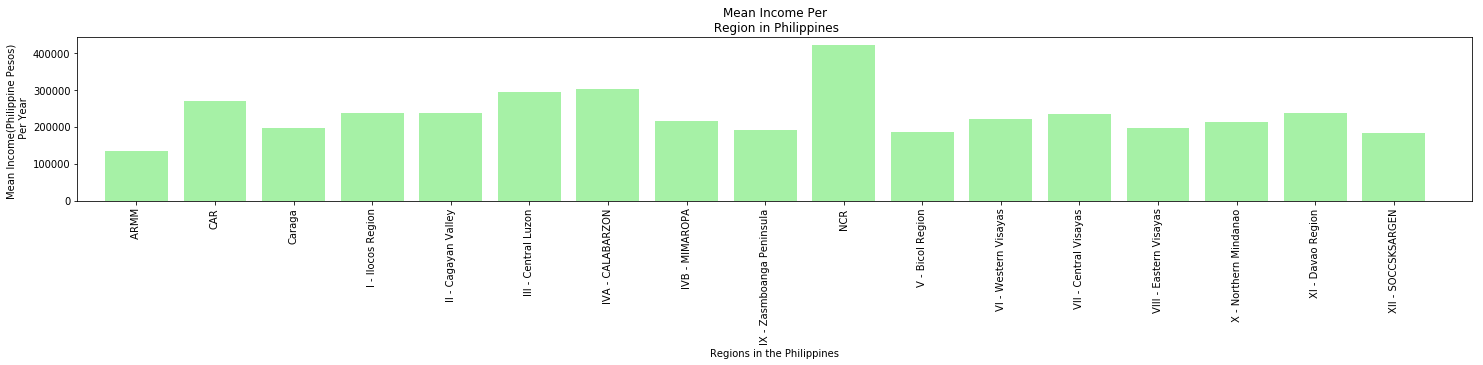

In [6]:
#Graph for average income per region in Philiippines
try_graph = pd.DataFrame(new).reset_index()
x_axis = np.arange(len(try_graph))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(25,3))
plt.bar(x_axis, try_graph["Total Household Income"], color='lightgreen', alpha=0.8, align="center")
plt.xticks(tick_locations, try_graph["Region"], rotation="vertical")
plt.title("Mean Income Per\n Region in Philippines")
plt.xlabel("Regions in the Philippines")
plt.ylabel("Mean Income(Philippine Pesos) \n Per Year")
plt.xlim(-.75,17)
plt.savefig("meanincomephilippines.png")

The above graph displays the mean income throughout the regions. The highest region by far is the NCR(National Captial Region) which is where the capital Manila resides. It would make sense that the capital city would contain the highest income. The second highest region(not significantlly higher than the rest) would be the IVA - Calabrazon region. This region is a part of Mindinao.


In [7]:
#more prep work for my edu graph
hh_edu = edu_df.groupby("Household Head Highest Grade Completed")
count_edu = hh_edu["Household Head Highest Grade Completed"].count()

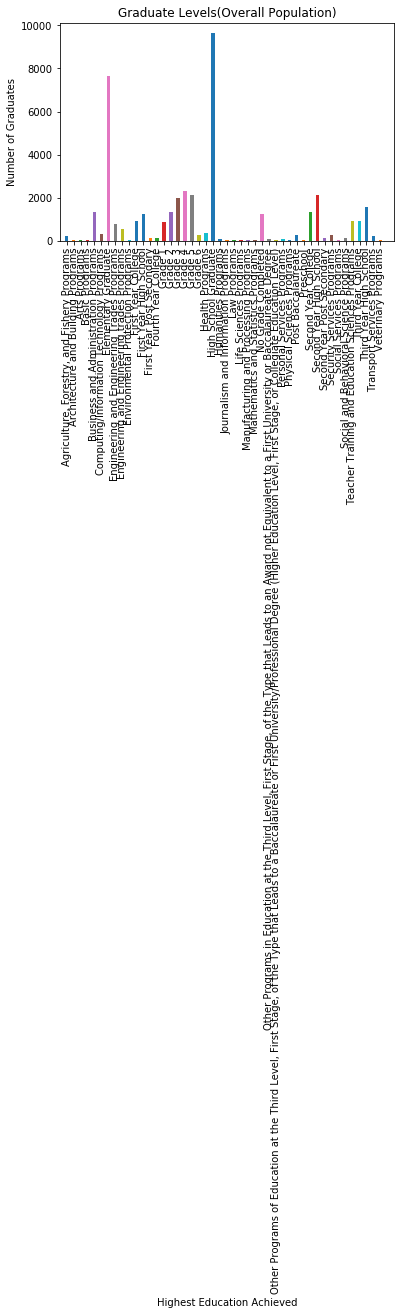

<Figure size 2880x360 with 0 Axes>

In [8]:
# I wanted to depict a graph with the pure data before condensing it. 
edu_chart = count_edu.plot(kind='bar')
plt.title("Graduate Levels(Overall Population)")
edu_chart.set_xlabel("Highest Education Achieved")
edu_chart.set_ylabel("Number of Graduates")
plt.xlim(-1,47)
plt.figure(figsize=(40,5))
plt.savefig("edugraphoverall")
plt.show()

The above educational graph has the pure data graphed as per population and graduation rates per education level.  The highest 2 portrayed are both elementary educated and high school educated.  There could be a multitude of reasons for these.  A percentage of the population which is older typically didn't return to school after grade school.  The new generation may graduate from high school, but being college is quite expensive, it is a luxury many cannot afford.  Below I decide to clean the data and isolate labels together to depict a better illustration to this effect.  

In [9]:
#need a copy to not create erros with the forloops for renaming like variables. 
edu_df = edu_df.copy()

# The below will take a bit to run however it will run, please be patient

In [10]:
for grades in edu_df["Household Head Highest Grade Completed"]:
    if "Grade" in grades:
        edu_df.replace({grades:"Elementary"},inplace=True)
    elif "High School" in grades:
        edu_df.replace({grades:"High School"},inplace=True)
    elif "College" in grades:
        edu_df.replace({grades:"College"},inplace=True)
    elif "Trade" in grades:
        edu_df.replace({grades:"Trade Specialization"},inplace=True)
    elif "Other" in grades:
        edu_df.replace({grades:"Other"},inplace=True)
    elif "Programs" in grades:
        edu_df.replace({grades:"Trade Specialization"},inplace=True)
    elif "Graduate" in grades:
        edu_df.replace({grades:"Elementary"},inplace=True)

In [11]:
edu_counts=edu_df.groupby("Household Head Highest Grade Completed").count()
edu_counts.reset_index()
fixed_edu = edu_counts.drop("Region",axis=1)
renamed_edu = fixed_edu.rename(columns = {"Total Household Income": "Number of Population"})

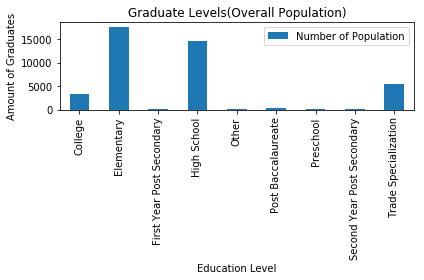

In [32]:
#my condensed edu chart
edu_chart2 = renamed_edu.plot(kind='bar', align = "center")
plt.title("Graduate Levels(Overall Population)")
plt.xlabel("Education Level")
plt.ylabel("Amount of Graduates")
plt.legend()
# plt.figure(figsize=(1,1))
plt.tight_layout()
plt.savefig("GraduateLevels.png")
plt.show()

As discussed in the above graph, Elementary gradautes take a huge sample size of the census data that was given in this data set followed by high school.  A large percentage of college graduates isn't present as education in the Philippines while not cost expensive, has a cost that a majority of the population cannot afford to pay. 

In [13]:
revised_df = data_df[["Region","Household Head Age","Household Head Marital Status","Household Head Sex"]]

In [14]:
avg_ages = revised_df.groupby("Region")["Household Head Age"].mean()

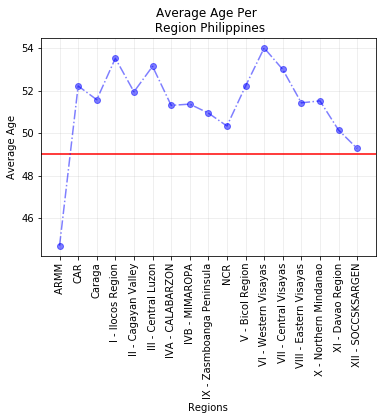

In [15]:
plt.plot(avg_ages,color="blue",marker="o",alpha=.50,linestyle="dashdot")
plt.ylabel("Average Age")
plt.xlabel("Regions")
plt.title("Average Age Per \n Region Philippines")
plt.grid(alpha=.25)
plt.hlines(49,-1,17,color="red")
plt.xlim(-1,17)
plt.xticks(rotation=90)
plt.savefig("avg_age_philippines")

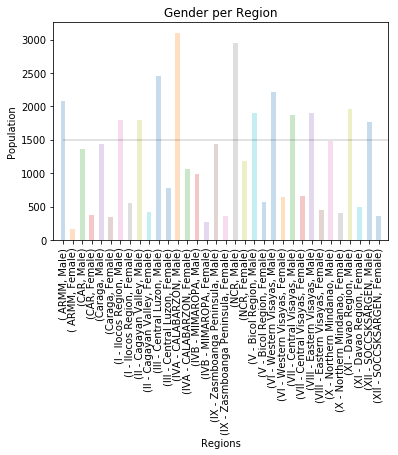

<Figure size 720x2880 with 0 Axes>

In [16]:
gender_count = revised_df.groupby("Region")["Household Head Sex"].value_counts()
gender_count.plot(kind='bar',align="center",alpha=.25)
plt.xlim(-1,34)
plt.ylabel("Population")
plt.hlines(1500,34,0,alpha=.15)
plt.xlabel("Regions")
plt.title("Gender per Region")
plt.figure(figsize=(10,40))
plt.tight_layout()

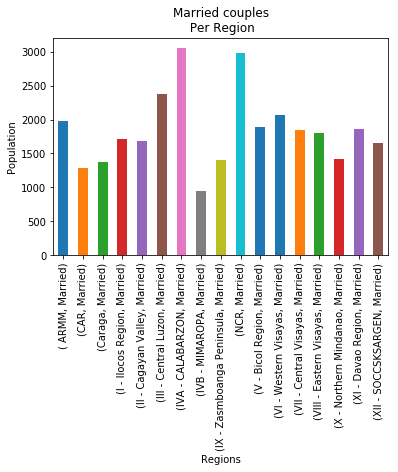

In [17]:
married = revised_df.groupby("Region")["Household Head Marital Status"].value_counts()
marr = revised_df[revised_df["Household Head Marital Status"]=="Married"]
marr_groupby = marr.groupby("Region")["Household Head Marital Status"].value_counts()
marr_groupby.plot(kind="bar")
plt.xlabel("Regions")
plt.ylabel("Population")
plt.title("Married couples\n Per Region")
plt.savefig("marriage")
single_groupby = revised_df.groupby("Region")["Household Head Marital Status"].value_counts()

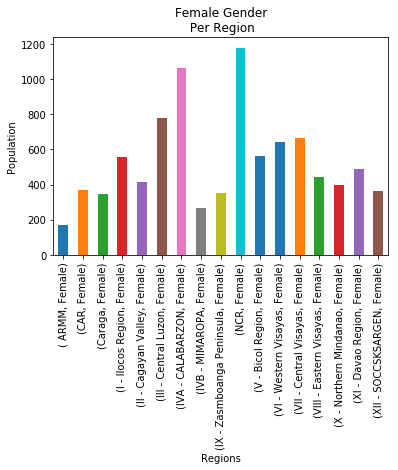

In [18]:
male_df = revised_df[revised_df["Household Head Sex"]=="Male"]
female_df = revised_df[revised_df["Household Head Sex"]=="Female"]
male_groupby = male_df.groupby("Region")["Household Head Sex"].value_counts()
female_groupby = female_df.groupby("Region")["Household Head Sex"].value_counts()
female_groupby.plot(kind="bar")
plt.xlabel("Regions")
plt.ylabel("Population")
plt.title("Female Gender\n Per Region")
plt.savefig("female.png")

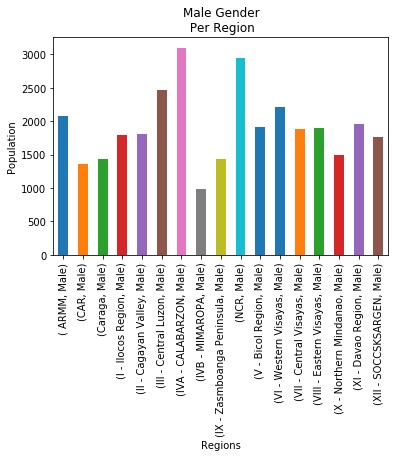

In [19]:
male_groupby.plot(kind="bar")
plt.xlabel("Regions")
plt.ylabel("Population")
plt.title("Male Gender\n Per Region")
plt.savefig("male.png")

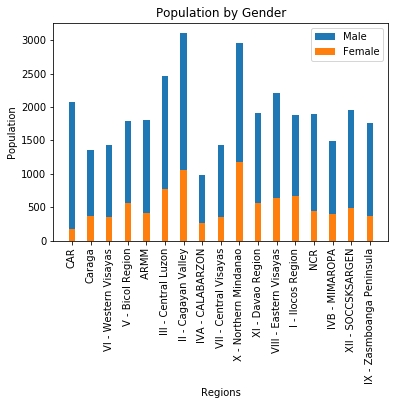

In [20]:
x_axis = np.arange(len(revised_df['Region'].unique()))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, revised_df["Region"].unique(), rotation="vertical")
width = .35
graph1 = plt.bar(x_axis, male_groupby, width)
graph2 = plt.bar(x_axis, female_groupby, width)
plt.ylabel('Population')
plt.title('Population by Gender')
plt.legend((graph1[0], graph2[0]), ('Male', 'Female'))
plt.xlabel("Regions")
plt.xticks()
plt.savefig("popbygender.png")
plt.show()